# Convolutional Neural Networks

Image classification problem
- data set of 32x32 color images 
- categorized into one of ten classifications

Start by defining the topology of our CNN. We'll start very simply - a single Conv2D layer, followed by a Dropout layer to prevent overfitting, which then gets flattened into a conventional deep neural network, with 512 neurons, a 50% dropout layer, and the final layer for our 10 possible classification results.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
    
def createModel(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model

We're going to train this neural network with the "cifar10" data set, which is built into Keras. It's 50,000 training images, and 10,000 test images - again, all of them 32x32 color images that represent one of ten different things.

Let's load it up, and convert the labels into "one-hot" format which makes them suitable for use in a neural network. After printing the shape of the training data and the size of the training and testing data sets as a sanity check, we'll illustrate one-hot, or "categorical" encoding by displaying one raw label and its one-hot representation as a binary array.

In [32]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

print (y_test[0])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print (y_test[0])

(50000, 32, 32, 3)
50000
10000
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


It's always a good idea to get an intuitive feel of the data you're dealing with, so let's display nine sample images from our training data, along with their labels. You can see here what the different categories represent, too.

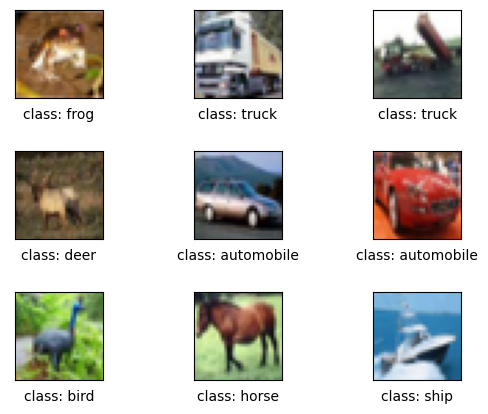

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Displaying the sample images with correct labels
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])

    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])

    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])


Convert our image pixel data from 8-bit values that range from 0-255 into floating point values that range from 0-1:

In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Now we can create and compile our CNN model. We'll use the RMSprop optimizer, create our model, and compile it.

In [35]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, epsilon=1e-6)

model = createModel(x_train.shape[1:])

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Let's have Keras output the topology to make sure it matches what we want.

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               16777728  
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 16,783,754
Trainable params: 16,783,754


Now let's actually train our neural network. In the interests of time, we'll just run 10 epochs because we haven't taken steps you'd normally take to make this run faster. But, let's see how long it takes to train this network over 10 epochs:

In [37]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=32,
          epochs=3,
          validation_data=(x_test, y_test),
          shuffle=True)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/3
1563/1563 [==============================] - 191s 122ms/step - loss: 1.9046 - accuracy: 0.3175 - val_loss: 1.6718 - val_accuracy: 0.4150
Epoch 2/3
1563/1563 [==============================] - 184s 118ms/step - loss: 1.6614 - accuracy: 0.4092 - val_loss: 1.5395 - val_accuracy: 0.4587
Epoch 3/3
1563/1563 [==============================] - 186s 119ms/step - loss: 1.5260 - accuracy: 0.4582 - val_loss: 1.4139 - val_accuracy: 0.5049
560.7458922863007


Now, let's measure the accuracy of our CNN against our test data:

In [38]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.4139 - accuracy: 0.5049
Test loss: 1.4139467477798462
Test accuracy: 0.5048999786376953


60%? Not that great. The accuracy was improving pretty quickly with every epoch though, so if we let it run longer we'd probably get much better results. It just takes an annoyingly long amount of time to do that, even when using tensorflow-gpu. But, we'll address that shortly!

To get an intuitive feel of just how good or bad our resulting model is, let's go through the first 100 test images and display the ones it got wrong. Are these errors understandable, or just a model that's embarassingly worse than a human?

1/1 [==============================] - 0s 17ms/step


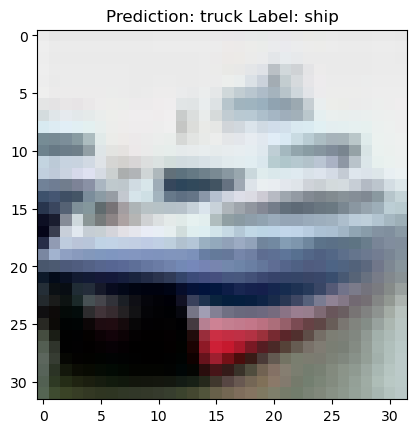

1/1 [==============================] - 0s 15ms/step


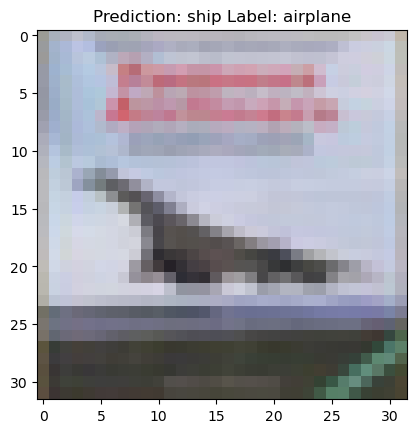

1/1 [==============================] - 0s 15ms/step


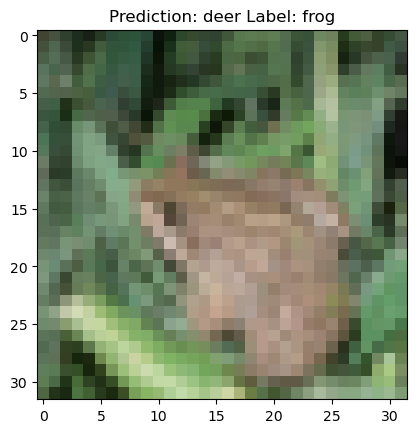

1/1 [==============================] - 0s 15ms/step


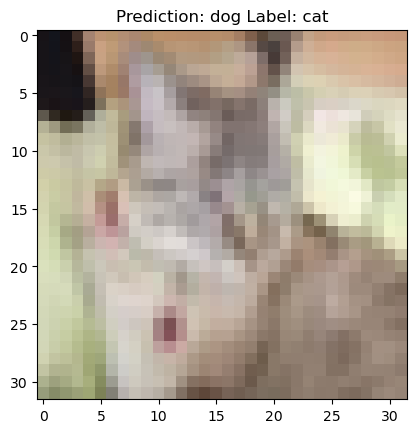

1/1 [==============================] - 0s 18ms/step


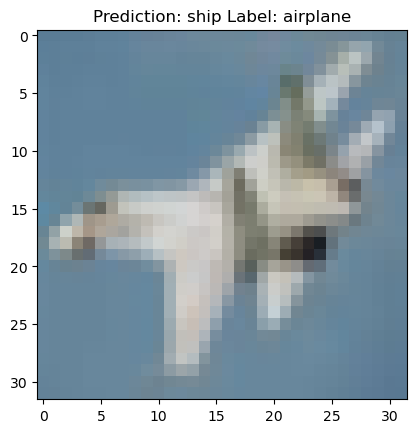

1/1 [==============================] - 0s 16ms/step


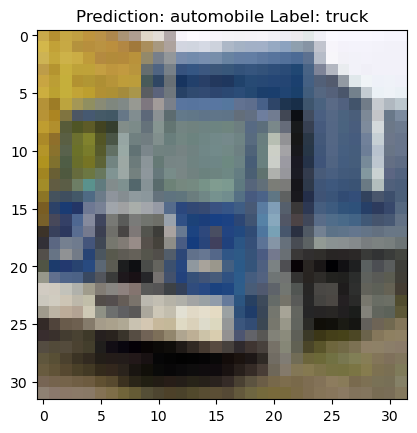

1/1 [==============================] - 0s 18ms/step


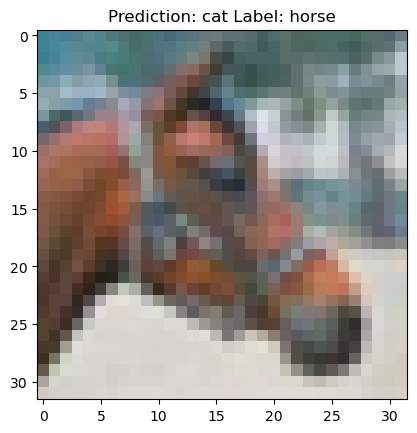

1/1 [==============================] - 0s 15ms/step


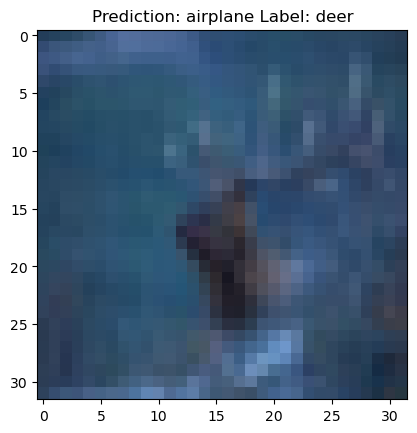

1/1 [==============================] - 0s 15ms/step


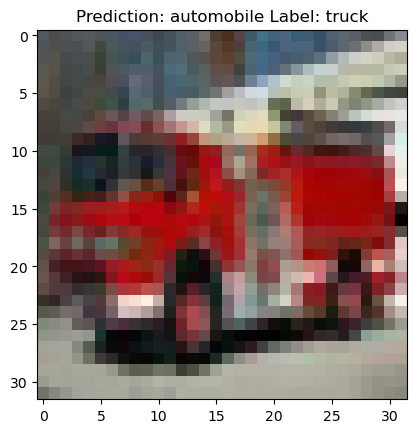

1/1 [==============================] - 0s 15ms/step


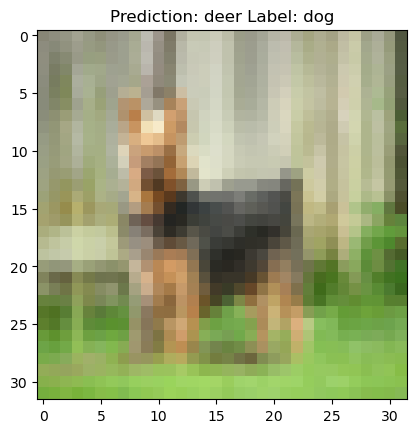

1/1 [==============================] - 0s 15ms/step


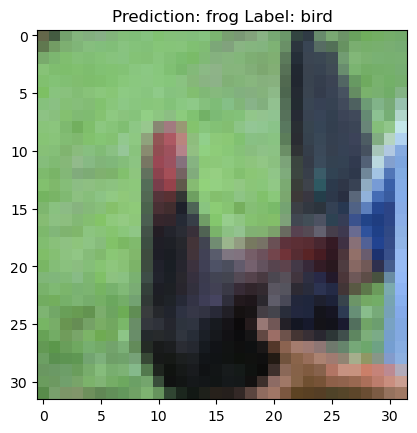

1/1 [==============================] - 0s 16ms/step


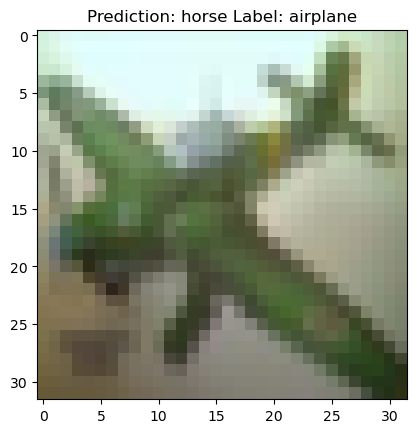

1/1 [==============================] - 0s 16ms/step


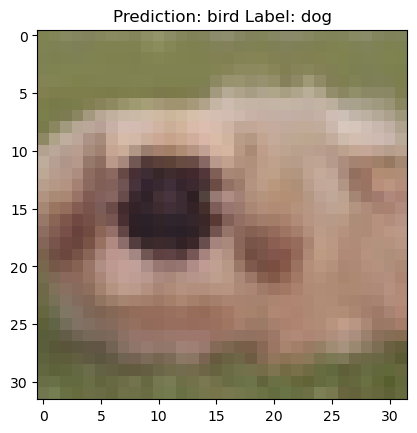

1/1 [==============================] - 0s 15ms/step


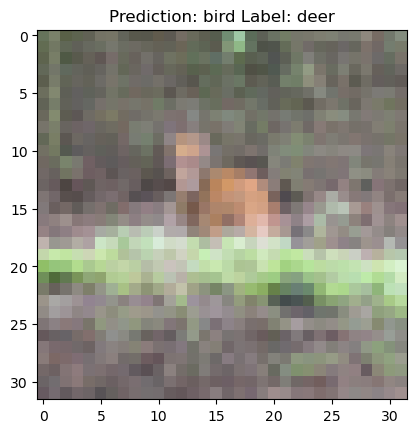

1/1 [==============================] - 0s 16ms/step


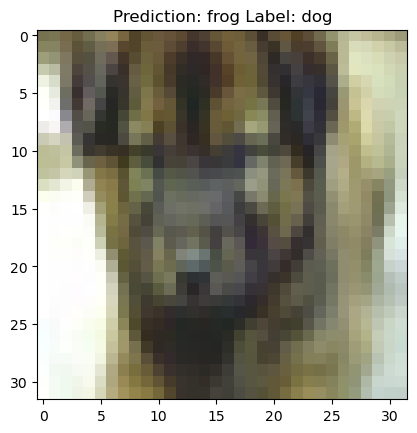

1/1 [==============================] - 0s 16ms/step


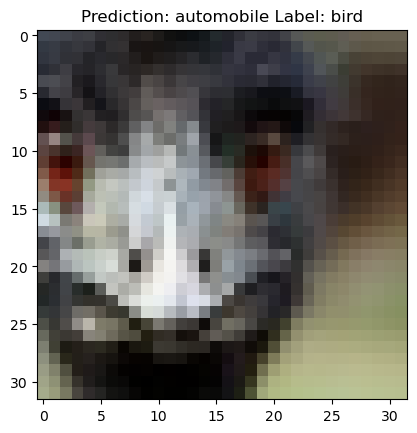

1/1 [==============================] - 0s 15ms/step


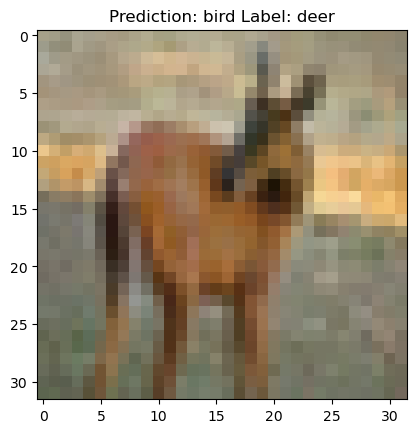

1/1 [==============================] - 0s 15ms/step


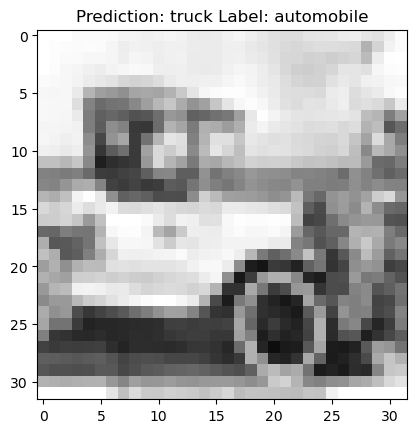

1/1 [==============================] - 0s 15ms/step


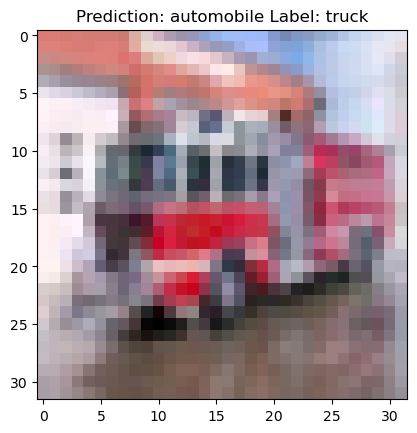

1/1 [==============================] - 0s 17ms/step


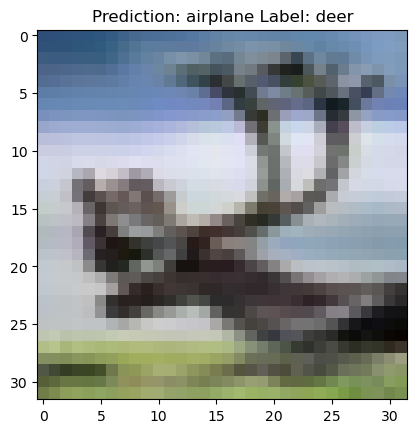

1/1 [==============================] - 0s 17ms/step


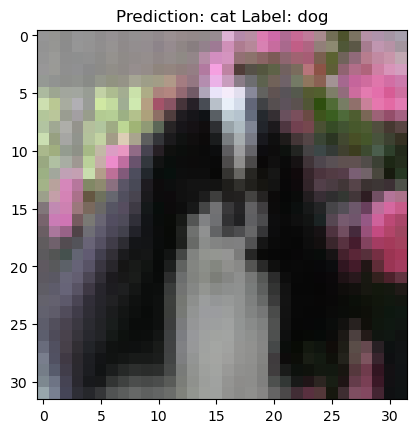

1/1 [==============================] - 0s 15ms/step


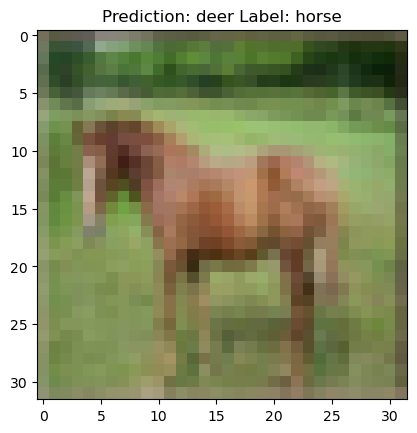

1/1 [==============================] - 0s 16ms/step


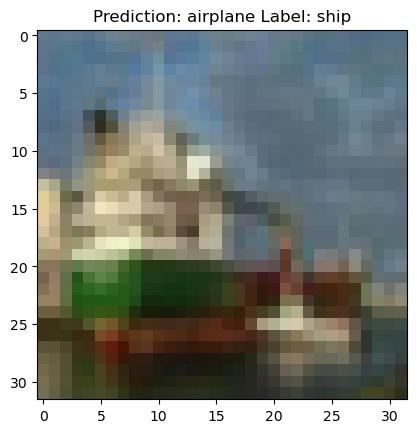

1/1 [==============================] - 0s 16ms/step


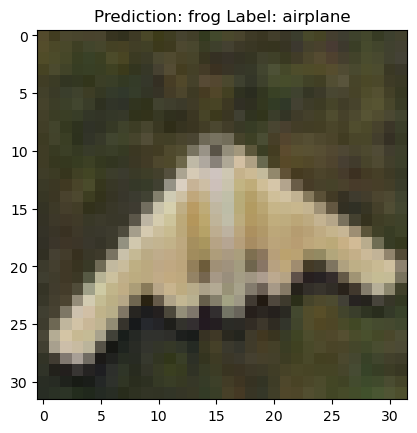

1/1 [==============================] - 0s 15ms/step


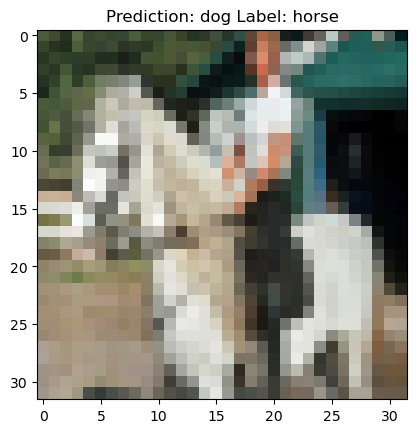

1/1 [==============================] - 0s 16ms/step


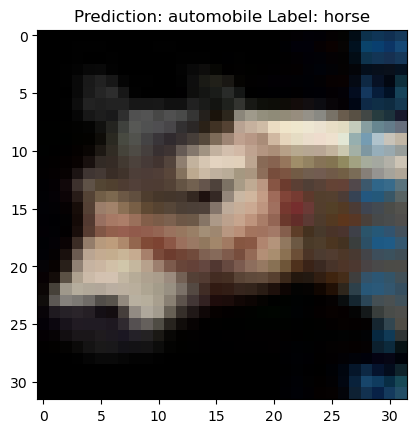

1/1 [==============================] - 0s 17ms/step


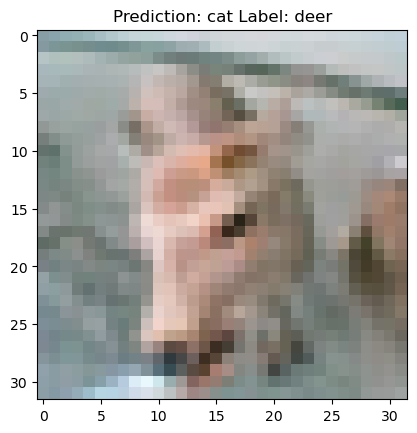

1/1 [==============================] - 0s 16ms/step


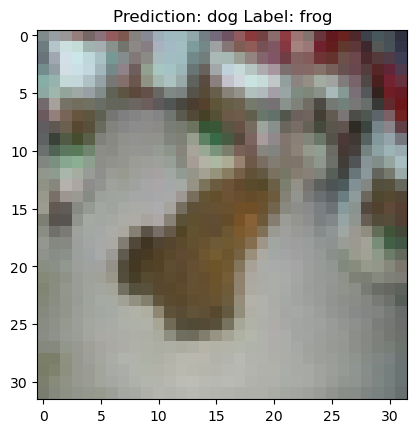

1/1 [==============================] - 0s 15ms/step


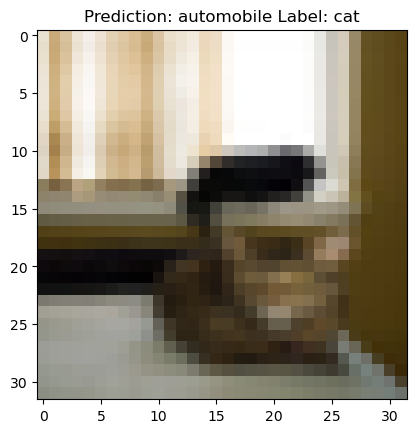

1/1 [==============================] - 0s 16ms/step


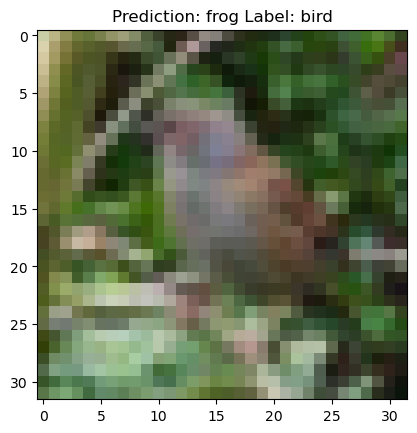

1/1 [==============================] - 0s 16ms/step


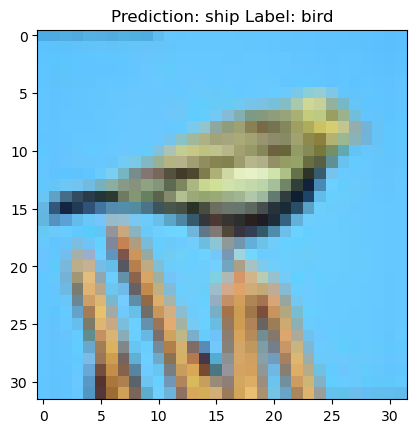

1/1 [==============================] - 0s 15ms/step


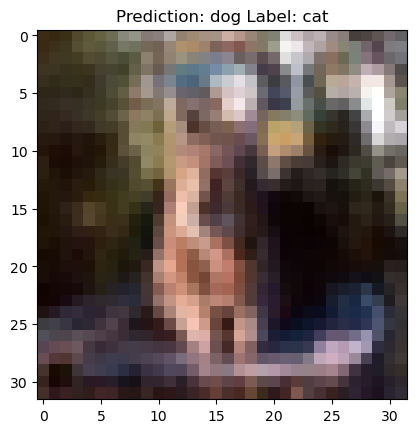

1/1 [==============================] - 0s 14ms/step


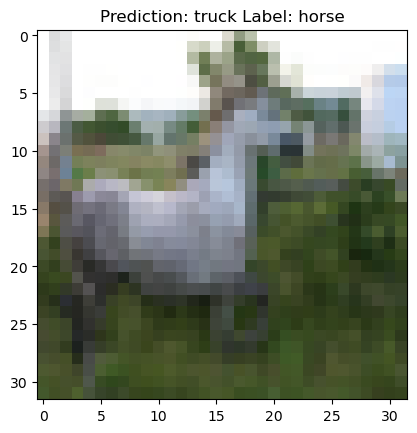

1/1 [==============================] - 0s 20ms/step


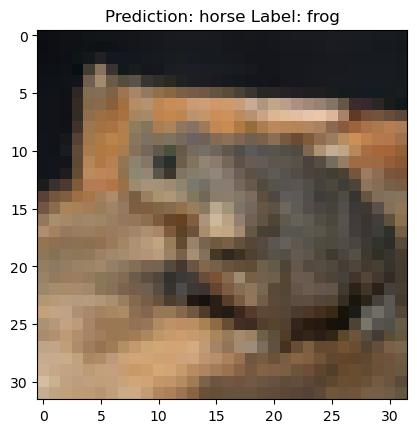

1/1 [==============================] - 0s 17ms/step


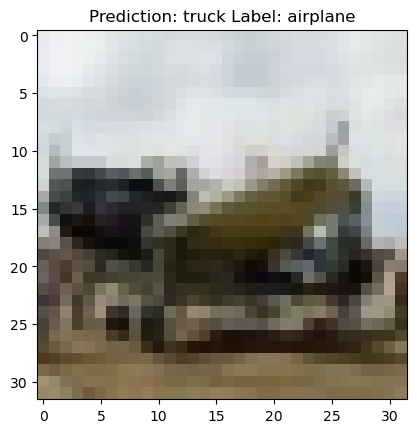

1/1 [==============================] - 0s 17ms/step


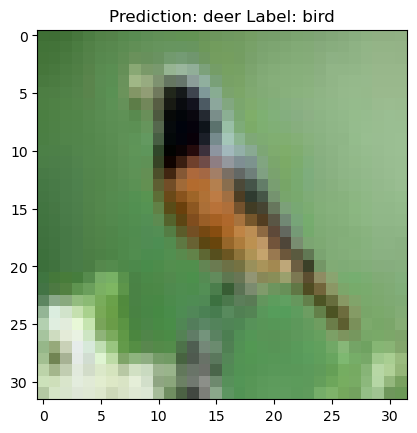

1/1 [==============================] - 0s 16ms/step


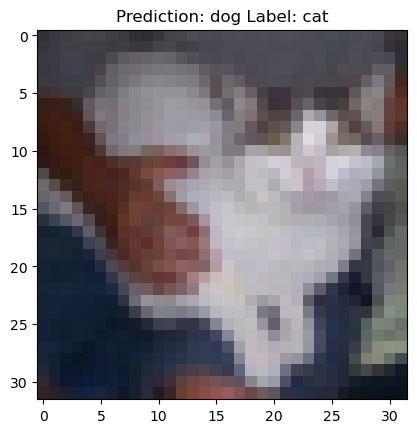

1/1 [==============================] - 0s 15ms/step


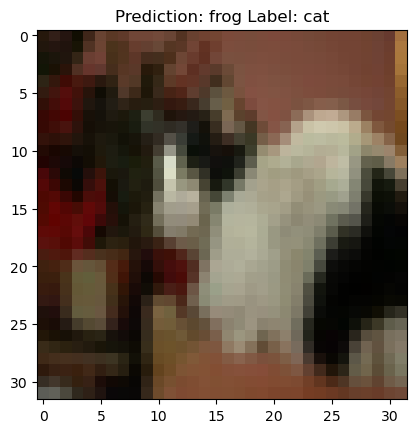

1/1 [==============================] - 0s 15ms/step


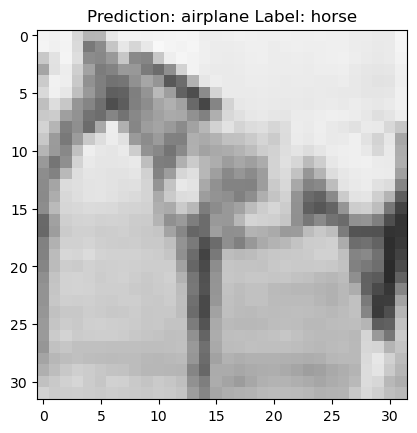

1/1 [==============================] - 0s 16ms/step


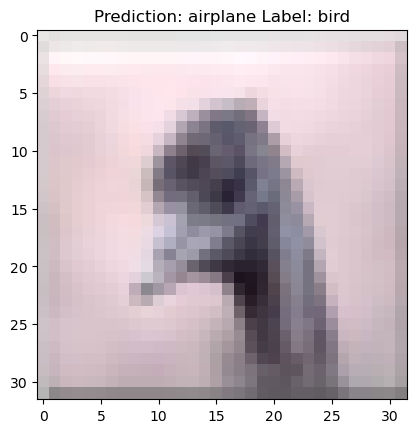

1/1 [==============================] - 0s 16ms/step


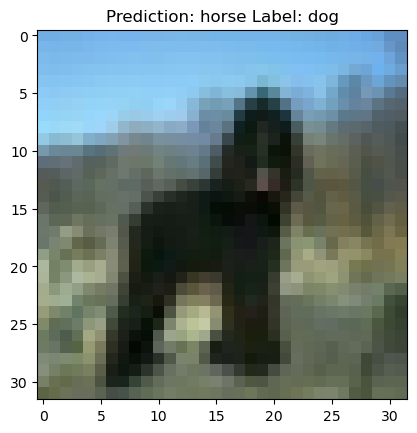

1/1 [==============================] - 0s 15ms/step


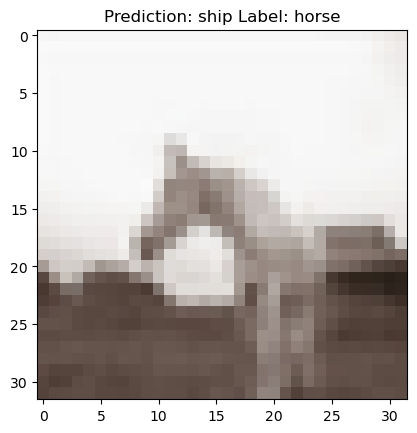

1/1 [==============================] - 0s 15ms/step


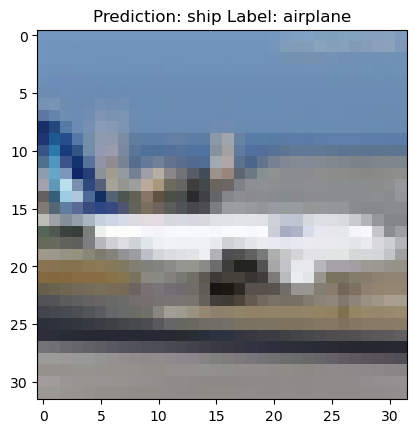

1/1 [==============================] - 0s 17ms/step


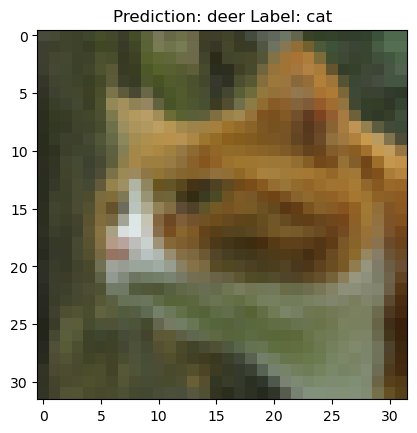

1/1 [==============================] - 0s 15ms/step


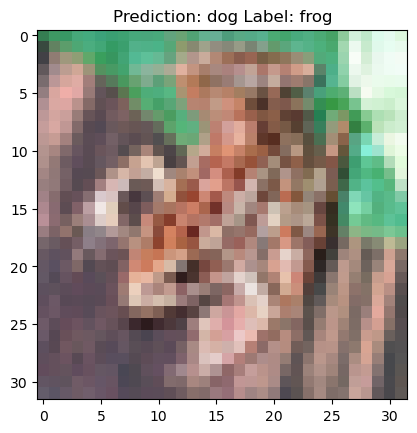

1/1 [==============================] - 0s 15ms/step


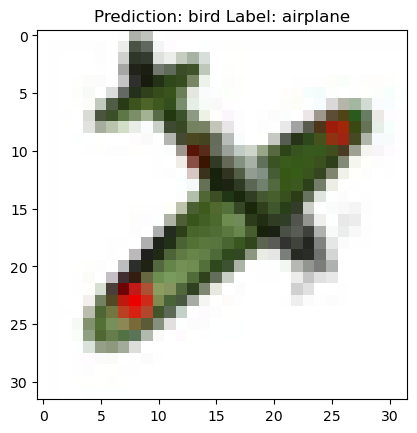

1/1 [==============================] - 0s 16ms/step


In [39]:
for x in range(100):
    test_image = x_test[x,:]
    predicted_cat = model.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()

Yeah, it's pretty bad. But CNN's are actually very powerful - we just haven't tuned it with the right topology, we haven't made it efficient enough to run enough epochs, and there are some other tricks we can use as well. Don't give up on them! We're about to improve on this model substantially.